In [17]:
# setup
import sys
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# add project root
sys.path.append("/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/src")

from config.constants import GIT_DIRECTORY

# load data
scores_path = os.path.join(GIT_DIRECTORY, "data", "language_scores_all_subjects.csv")
df = pd.read_csv(scores_path)

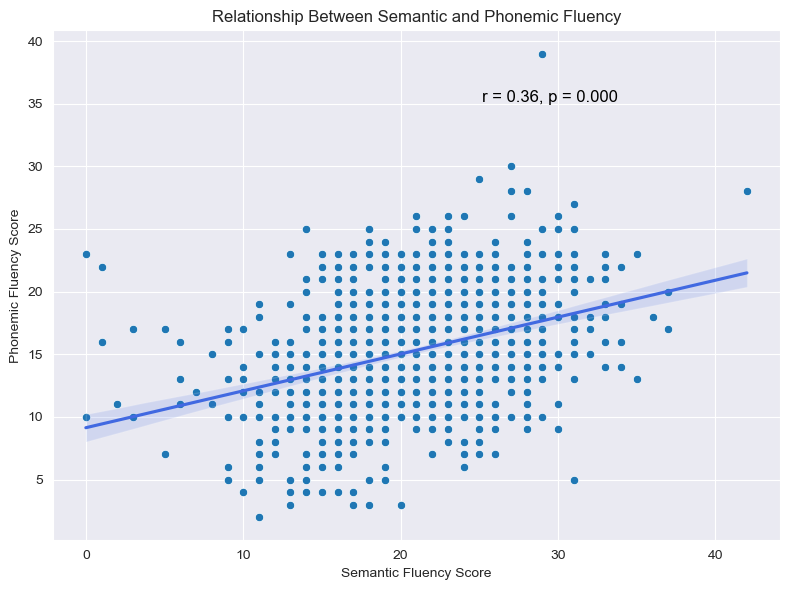

In [18]:
# Semantic vs. Phonemic Fluency

# calculate correlation
clean_df = df[["SemanticFluencyScore", "PhonemicFluencyScore"]].dropna()
r, p = pearsonr(clean_df["SemanticFluencyScore"], clean_df["PhonemicFluencyScore"])

# plot
matplotlib.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="SemanticFluencyScore", y="PhonemicFluencyScore")
sns.regplot(data=df, x="SemanticFluencyScore", y="PhonemicFluencyScore", scatter=False, color="royalblue")

# annotate r
plt.text(
    x=df["SemanticFluencyScore"].max() * 0.6,
    y=df["PhonemicFluencyScore"].max() * 0.9,
    s=f"r = {r:.2f}, p = {p:.3f}",
    fontsize=12,
    color="black"
)

plt.xlabel("Semantic Fluency Score")
plt.ylabel("Phonemic Fluency Score")
plt.title("Relationship Between Semantic and Phonemic Fluency")
plt.tight_layout()
plt.savefig(os.path.join(GIT_DIRECTORY, "results", "plots", "feature_vs_target", f"semantic_phonemic_fluency_correlation.png"), dpi=300)
plt.show()